In [1]:
from bs4 import BeautifulSoup
import pandas as pd


# Note: You need to capture webpages from the website 
# and save them as html files in the same directory as this script
# or use main() for webscrapping
def html_file_parser(filename):
    with open(filename, 'r') as file:
        html_content = file.read()

    return BeautifulSoup(html_content, 'html.parser')

def dataframe_creator(listings):

    data = []

    for listing in listings:
        title = listing.find('h2', class_='listing-search-item__title').get_text(strip=True)
        address = listing.find('div', class_="listing-search-item__sub-title'").get_text(strip=True)
        rent = listing.find('div', class_='listing-search-item__price').get_text(strip=True)
        features = listing.find_all('li', class_='illustrated-features__item')
        
        size = features[0].get_text(strip=True) if len(features) > 0 else None
        rooms = features[1].get_text(strip=True) if len(features) > 1 else None
        type_or_year = features[2].get_text(strip=True) if len(features) > 2 else None

        data.append([title, address, rent, size, rooms, type_or_year])

    return pd.DataFrame(data, columns=['Title', 'Address', 'Rent', 'Size', 'Rooms', 'Type/Year'])

def main():

    listings = []
    for i in range(1, 5):
        soup = html_file_parser(f'pararius_captures/page{i}.html')
        listings += soup.find_all('li', class_='search-list__item search-list__item--listing')
    return dataframe_creator(listings)
    

In [2]:
df = main()
df

,Title,Address,Rent,Size,Rooms,Type/Year
0,Flat Hogewoerd,2311 HL Leiden (Levendaal-Oost),"€1,335 per month",74 m²,3 rooms,Upholstered
1,Flat Langegracht,2312 NW Leiden (Noordvest),€980 per month,25 m²,1 room,Upholstered
2,Flat Plantijnstraat,2321 JG Leiden (Cronestein),"€1,475 per month",63 m²,2 rooms,Furnished
3,House Nieuwe Mare,2312 NL Leiden (Molenbuurt),"€2,995 per month",162 m²,6 rooms,Furnished
4,House Brandts Buyskade,2324 LS Leiden (Boshuizen),"€1,900 per month",95 m²,4 rooms,Furnished
...,...,...,...,...,...,...
97,Flat Perzikweg 10,2321 DG Leiden (Cronestein),"€2,010 per month",121 m²,3 rooms,2023
98,Flat Stationsplein 64,2312 AL Leiden (Stationskwartier),€859 per month,80 m²,4 rooms,1961
99,Flat Ketelboetersteeg 11,2311 TN Leiden (Pieterswijk),"€1,275 per month",54 m²,2 rooms,Upholstered
100,Flat Bachstraat 438,2324 GZ Leiden (Fortuinwijk-Noord),"€1,650 per month",68 m²,3 rooms,Upholstered


In [3]:
df['Rooms'] = df['Rooms'].str.split(' ').str[0].astype(int)
df['Size'] = df['Size'].str.split(' ').str[0].astype(int)
df['Rent'] = df['Rent'].str.split(' ').str[0].str.replace('€', '').str.replace(',', '').astype(int)
df

,Title,Address,Rent,Size,Rooms,Type/Year
0,Flat Hogewoerd,2311 HL Leiden (Levendaal-Oost),1335,74,3,Upholstered
1,Flat Langegracht,2312 NW Leiden (Noordvest),980,25,1,Upholstered
2,Flat Plantijnstraat,2321 JG Leiden (Cronestein),1475,63,2,Furnished
3,House Nieuwe Mare,2312 NL Leiden (Molenbuurt),2995,162,6,Furnished
4,House Brandts Buyskade,2324 LS Leiden (Boshuizen),1900,95,4,Furnished
...,...,...,...,...,...,...
97,Flat Perzikweg 10,2321 DG Leiden (Cronestein),2010,121,3,2023
98,Flat Stationsplein 64,2312 AL Leiden (Stationskwartier),859,80,4,1961
99,Flat Ketelboetersteeg 11,2311 TN Leiden (Pieterswijk),1275,54,2,Upholstered
100,Flat Bachstraat 438,2324 GZ Leiden (Fortuinwijk-Noord),1650,68,3,Upholstered


In [4]:
import sqlite3

conn = sqlite3.connect('data.db')
df.to_sql('data', conn, if_exists='replace', index=False)
conn.close()

In [5]:
# sqlite3 data.db
# SELECT * FROM data;

In [6]:
%load_ext sql

%sql sqlite:///data.db

result = %sql SELECT * FROM data

result


 * sqlite:///data.db
Done.


Title,Address,Rent,Size,Rooms,Type/Year
Flat Hogewoerd,2311 HL Leiden (Levendaal-Oost),1335,74,3,Upholstered
Flat Langegracht,2312 NW Leiden (Noordvest),980,25,1,Upholstered
Flat Plantijnstraat,2321 JG Leiden (Cronestein),1475,63,2,Furnished
House Nieuwe Mare,2312 NL Leiden (Molenbuurt),2995,162,6,Furnished
House Brandts Buyskade,2324 LS Leiden (Boshuizen),1900,95,4,Furnished
Flat Galgewater,2311 VZ Leiden (Academiewijk),2100,75,2,Furnished
Flat Kruidenhof,2315 KP Leiden (De Waard),1350,44,2,Upholstered
Flat Kruidenhof,2315 KP Leiden (De Waard),1375,50,2,Upholstered
Flat Hogewoerd 62,2311 HP Leiden (Levendaal-Oost),1450,55,2,Upholstered
Flat Breestraat 89 E,2311 CK Leiden (Pieterswijk),2050,69,3,1650


<Axes: xlabel='Size'>

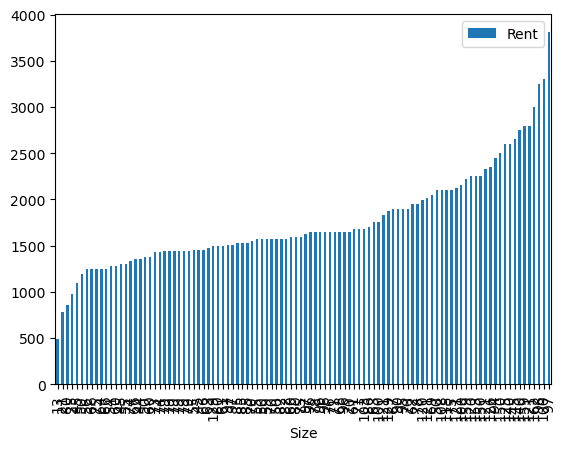

In [7]:
df_sorted = df.sort_values('Rent')
df_sorted.plot(x='Size', y='Rent', kind='bar')


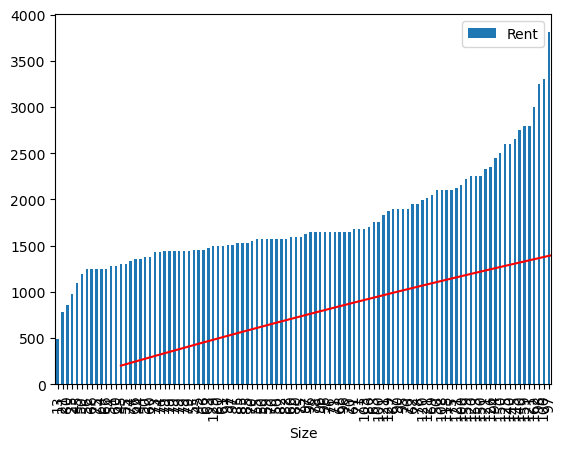

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X = poly_features.fit_transform(df[['Size']])

regression_model = LinearRegression()
regression_model.fit(X, df['Rent'])

coef = regression_model.coef_

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(13, 163)
y = coef[0] + coef[1] * x + coef[2] * x**2

df_sorted.plot(x='Size', y='Rent', kind='bar')
plt.plot(x, y, color='red')

plt.show()
